# Sharvari Lahane
# Data Science - Batch May 2024 (Baner, Pune) - Assignment 5
# EDA_1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [10]:
df = pd.read_csv('Cardiotocographic.csv')

In [12]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


# Data Cleaning and Preparation

Check for missing values

In [27]:
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


Impute missing values with mean for numerical columns

In [31]:
df['LB'].fillna(df['LB'].mean(), inplace=True)
df['AC'].fillna(df['AC'].mean(), inplace=True)
df['DS'].fillna(df['DS'].mean(), inplace=True)
df['DP'].fillna(df['DP'].mean(), inplace=True)
df['MLTV'].fillna(df['MLTV'].mean(), inplace=True)
df['Width'].fillna(df['Width'].mean(), inplace=True)
df['Tendency'].fillna(df['Tendency'].mean(), inplace=True)
df['NSP'].fillna(df['NSP'].mean(), inplace=True)

In [33]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


Detect and treat outliers

In [69]:
Q1 = data['LB'].quantile(0.25)
Q3 = data['LB'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['LB']<L)| (df['LB']>U)]
print(Outliers)

Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []


In [65]:
Q1 = data['DS'].quantile(0.25)
Q3 = data['DS'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['DS']<L)| (df['DS']>U)]
print(Outliers)

              LB        AC        FM        UC        DL            DS  \
33    120.000000  0.007506  0.102585  0.000800  0.000834 -1.790000e-06   
38    115.000000  0.006242  0.064919  0.003745  0.001248  3.667736e-06   
50    133.343598  0.003219  0.000000  0.008086  0.000000  2.508984e-06   
69    144.000000  0.000000  0.000000  0.004992  0.000000 -3.240000e-06   
84    145.000000  0.012712  0.029917  0.001412  0.000000  2.542969e-06   
...          ...       ...       ...       ...       ...           ...   
2061  127.000000  0.000000  0.000000  0.004575  0.000000  2.390162e-07   
2075  130.000000  0.007011  0.000876  0.000876  0.000000 -1.353180e-03   
2080  130.000000  0.003003  0.002002  0.001001  0.000000 -2.120000e-06   
2088  133.000000  0.000000  0.001236  0.006180  0.000000 -8.720000e-07   
2112  136.000000  0.000000  0.004823  0.006431  0.008039  9.488398e-07   

            DP  ASTV  MSTV  ALTV       MLTV      Width  Tendency       NSP  
33    0.000000  28.0   3.4   0.0  

In [55]:
Q1 = data['AC'].quantile(0.25)
Q3 = data['AC'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['AC']<L)| (df['AC']>U)]
print(Outliers)

Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []


In [59]:
Q1 = data['MLTV'].quantile(0.25)
Q3 = data['MLTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['MLTV']<L)| (df['MLTV']>U)]
print(Outliers)

         LB        AC        FM        UC        DL        DS        DP  ASTV  \
3     134.0  0.002561  0.000000  0.007742  0.002561  0.000000  0.000000  16.0   
10    151.0  0.000000  0.000000  0.000834  0.000834  0.000000  0.000000  64.0   
11    150.0  0.000000  0.000000  0.001014  0.000983  0.000000  0.000000  64.0   
33    120.0  0.007506  0.102585  0.000800  0.000834 -0.000002  0.000000  28.0   
35    120.0  0.006061  0.109091  0.007273  0.000000  0.000000  0.000000  27.0   
...     ...       ...       ...       ...       ...       ...       ...   ...   
1750  134.0  0.004800  0.001600  0.001600  0.003200  0.000000  0.003200  62.0   
1800  143.0  0.000000  0.000000  0.003717  0.000000 -0.000004  0.000000  66.0   
1818  139.0  0.011139  0.001007  0.007049  0.000000  0.000003  0.000000  53.0   
1882  139.0  0.001835  0.000000  0.006422  0.000000  0.000000  0.000000  58.0   
2033  129.0  0.000000  0.001122  0.006734  0.005767  0.000004  0.002245  67.0   

      MSTV  ALTV   MLTV  Wi

In [67]:
Q1 = data['DP'].quantile(0.25)
Q3 = data['DP'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['DP']<L)| (df['DP']>U)]
print(Outliers)

         LB        AC        FM        UC        DL            DS        DP  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000e+00  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000e+00  0.002805   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.000000e+00  0.000826   
15    130.0  0.005571  0.380223  0.004178  0.004178  0.000000e+00  0.001393   
17    131.0  0.001524  0.382622  0.003049  0.004573  0.000000e+00  0.001524   
...     ...       ...       ...       ...       ...           ...       ...   
2073  130.0  0.007321  0.000732  0.000732  0.000000  0.000000e+00  0.000032   
2102  133.0 -0.000091  0.006031  0.007238  0.000000  0.000000e+00 -0.000026   
2110  136.0  0.000000  0.004110  0.008219  0.006849  0.000000e+00  0.001370   
2111  136.0  0.000000  0.001156  0.008696  0.008696  0.000000e+00  0.002174   
2112  136.0  0.000000  0.004823  0.006431  0.008039  9.488398e-07  0.001608   

      ASTV    MSTV      ALTV       MLTV  Width  Ten

In [73]:
Q1 = data['Width'].quantile(0.25)
Q3 = data['Width'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['Width']<L)| (df['Width']>U)]
print(Outliers)

              LB        AC        FM        UC        DL   DS        DP  ASTV  \
54    147.816574  0.000000  0.002502  0.000000 -0.000059  0.0  0.000000  70.0   
64    141.000000  0.001282  0.000000  0.005128  0.000000  0.0  0.000000  25.0   
120   123.000000  0.000000  0.000000  0.005004  0.004170  0.0  0.000000  47.0   
389   129.000000  0.008264  0.053719  0.002066  0.000000  0.0  0.000000  37.0   
704   130.030418  0.000000  0.352941  0.000000  0.000000  0.0  0.005348  80.0   
829   152.000000  0.000000  0.000000  0.003854  0.000963  0.0  0.000000  58.0   
860   142.000000  0.001471  0.001542  0.004412  0.000000  0.0  0.000000  39.0   
1273  115.000000  0.007032  0.000000  0.005626  0.000000  0.0  0.000000  20.0   
1320  128.000000  0.006519  0.007823  0.005215  0.005215  0.0  0.001304  19.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
54     0.3  69.000000   5.1 -174.0       1.0  3.004535  
64     1.5   0.000000  13.4 -174.0       1.0  1.000000  
120    1.1  30.198

In [77]:
Q1 = data['Tendency'].quantile(0.25)
Q3 = data['Tendency'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['Tendency']<L)| (df['Tendency']>U)]
print(Outliers)

         LB        AC        FM        UC        DL            DS   DP  \
449   135.0  0.001233  0.002466  0.000000  0.000000  0.000000e+00  0.0   
692   133.0  0.007740  0.442724  0.004644  0.004644  0.000000e+00  0.0   
952   136.0  0.009506  0.000000  0.005703  0.002852  0.000000e+00  0.0   
1039  125.0  0.000000  0.000000  0.005217  0.000000  0.000000e+00  0.0   
1098  122.0  0.000000 -0.000064  0.002516  0.000067  0.000000e+00  0.0   
1318  125.0  0.002062  0.014433  0.006186  0.008247  0.000000e+00  0.0   
1392  142.0  0.000000  0.000000  0.007463  0.000000  0.000000e+00  0.0   
1595  134.0  0.000000  0.000000  0.005181  0.007772  0.000000e+00  0.0   
1856  138.0  0.013713  0.000000  0.004219  0.000000  0.000000e+00  0.0   
2088  133.0  0.000000  0.001236  0.006180  0.000000 -8.720000e-07  0.0   

           ASTV  MSTV  ALTV       MLTV       Width  Tendency  NSP  
449   58.000000   0.6  15.0   8.000000   95.000000 -3.000000  1.0  
692   24.000000  -6.6   0.0  13.400000  124.99435

In [79]:
Q1 = data['NSP'].quantile(0.25)
Q3 = data['NSP'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['NSP']<L)| (df['NSP']>U)]
print(Outliers)

         LB        AC        FM        UC        DL            DS        DP  \
0     120.0  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000e+00  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000e+00  0.002805   
7     122.0  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   
9     122.0  0.000000  0.000000  0.002967  0.000000  0.000000e+00  0.000000   
...     ...       ...       ...       ...       ...           ...       ...   
2112  136.0  0.000000  0.004823  0.006431  0.008039  9.488398e-07  0.001608   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.000000e+00  0.000000   
2122  140.0  0.000775  0.000000  0.006979  0.000000  0.000000e+00  0.000000   
2123  140.0  0.000980  0.000000  0.006863  0.000000  0.000000e+00  0.000000   
2124  140.0  0.000679  0.000000  0.006110  0.000000  0.000000e+00  0.000000   

      ASTV  MSTV  ALTV       MLTV       Width  Tend

In [81]:
Q1 = data['FM'].quantile(0.25)
Q3 = data['FM'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['FM']<L)| (df['FM']>U)]
print(Outliers)

         LB        AC        FM        UC        DL   DS        DP  ASTV  \
12    131.0  0.005076  0.072335  0.007614  0.002538  0.0  0.000000  28.0   
13    131.0  0.009077  0.222390  0.006051  0.001513  0.0  0.000000  28.0   
14    130.0  0.005838  0.407840  0.004170  0.005004  0.0  0.000826  21.0   
15    130.0  0.005571  0.380223  0.004178  0.004178  0.0  0.001393  19.0   
16    130.0  0.006088  0.441400  0.004566  0.004566  0.0  0.000000  24.0   
...     ...       ...       ...       ...       ...  ...       ...   ...   
2083  130.0  0.000000  0.008861  0.007595  0.000000  0.0  0.000000  73.0   
2099  133.0  0.000000  0.008653  0.004944  0.000000  0.0  0.000000  72.0   
2100  133.0  0.000000  0.009840  0.004920  0.000000  0.0  0.000000  70.0   
2101  133.0  0.000000  0.009357  0.008187  0.000000  0.0  0.000000  69.0   
2121  140.0  0.000000  0.961268  0.007426  0.000000  0.0  0.000000  79.0   

        MSTV       ALTV  MLTV  Width  Tendency  NSP  
12    1.4000  -0.702936  12.9   6

In [83]:
Q1 = data['UC'].quantile(0.25)
Q3 = data['UC'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['UC']<L)| (df['UC']>U)]
print(Outliers)

              LB        AC       FM        UC        DL   DS        DP  ASTV  \
543   140.000000  0.000029  0.00000  0.029851  0.000000  0.0  0.000000  53.0   
793   146.000000  0.000388  0.00000 -0.014925  0.001940  0.0  0.000000  52.0   
917   121.851326  0.000000  0.00000  0.029851  0.000000  0.0  0.001706  33.0   
1164  131.000000  0.010661  0.00000  0.014925  0.000000  0.0  0.000000  26.0   
1396  142.000000  0.000872  0.00000 -0.014925  0.004359  0.0  0.000000  49.0   
1469  148.000000  0.003633  0.00000 -0.014925  0.000000  0.0  0.000000  36.0   
1593  134.000000  0.000000  0.00000  0.029936  0.008086  0.0  0.000000  20.0   
1671  110.000000  0.003799  0.00076  0.029851  0.000760  0.0 -0.000017  65.0   
1717  131.000000  0.009857  0.00000  0.030002  0.000896  0.0  0.000000  54.0   
1868  138.000000  0.007143  0.00000 -0.014925  0.003571  0.0  0.000000  49.0   
1902  130.000000  0.005941  0.00000  0.013861  0.011837  0.0  0.000000  57.0   
1903  130.000000  0.002053  0.00000  0.0

In [85]:
Q1 = data['DL'].quantile(0.25)
Q3 = data['DL'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['DL']<L)| (df['DL']>U)]
print(Outliers)

         LB        AC        FM        UC        DL   DS        DP       ASTV  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  0.002099  26.000000   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.000000   
28    132.0 -0.000040  0.135113  0.000834  0.008340  0.0  0.000834  29.000000   
29    132.0  0.000000  0.098784  0.000000  0.012158  0.0  0.000000  26.000000   
30    132.0  0.000000  0.107590  0.001702  0.010008  0.0  0.000000  26.487809   
...     ...       ...       ...       ...       ...  ...       ...        ...   
2045  128.0  0.000000  0.006222  0.008889  0.009778  0.0  0.000000  63.000000   
2046  128.0  0.000000  0.006604  0.008491  0.009434  0.0  0.000000  63.000000   
2047  128.0  0.000000  0.007675  0.006579  0.009868  0.0  0.000000  63.000000   
2048  128.0  0.000000  0.000000  0.008032  0.010040  0.0  0.000000  63.000000   
2111  136.0  0.000000  0.001156  0.008696  0.008696  0.0  0.002174  63.000000   

      MSTV  ALTV  MLTV  Wid

In [87]:
Q1 = data['ASTV'].quantile(0.25)
Q3 = data['ASTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['ASTV']<L)| (df['ASTV']>U)]
print(Outliers)

         LB        AC        FM        UC        DL   DS   DP   ASTV  MSTV  \
131   158.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  -63.0   0.6   
232   123.0  0.003650  0.005474  0.000000  0.000000  0.0  0.0  162.0   0.7   
345   139.0 -0.000007  0.006593  0.000000  0.000000  0.0  0.0  162.0   0.2   
504   128.0  0.008253  0.013755  0.004127  0.000000  0.0  0.0  -63.0   1.1   
1014  139.0  0.006312  0.000000  0.004509  0.000000  0.0  0.0  162.0   0.8   
1195  138.0  0.011752  0.000000  0.005342  0.000000  0.0  0.0  -63.0   1.2   
1578  132.0  0.000000 -0.002889  0.002994  0.000074  0.0  0.0  -63.0   1.1   
1941  133.0  0.000000  0.003562  0.006233  0.003562  0.0  0.0  162.0   2.1   
2008  125.0  0.001196  0.001196  0.008373  0.009569  0.0  0.0  162.0   1.1   

      ALTV       MLTV       Width  Tendency      NSP  
131   31.0   8.600000   92.000000       1.0  1.00000  
232    0.0   8.600000   71.000000       1.0  0.98342  
345   59.0   4.200000   11.000000       0.0  2.00000  

In [89]:
Q1 = data['MSTV'].quantile(0.25)
Q3 = data['MSTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['MSTV']<L)| (df['MSTV']>U)]
print(Outliers)

         LB        AC        FM        UC        DL   DS        DP       ASTV  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.0  0.002099  26.000000   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.0  0.002805  29.000000   
28    132.0 -0.000040  0.135113  0.000834  0.008340  0.0  0.000834  29.000000   
29    132.0  0.000000  0.098784  0.000000  0.012158  0.0  0.000000  26.000000   
30    132.0  0.000000  0.107590  0.001702  0.010008  0.0  0.000000  26.487809   
...     ...       ...       ...       ...       ...  ...       ...        ...   
2024  129.0  0.000000  0.001669  0.005008  0.013454  0.0  0.000000  58.000000   
2034  129.0  0.000000  0.001073  0.006438  0.005365  0.0  0.002146  67.000000   
2048  128.0  0.000000  0.000000  0.008032  0.010040  0.0  0.000000  63.000000   
2049  125.0  0.004768  0.015495  0.007151  0.000000  0.0  0.000000  66.000000   
2051  127.0  0.002587  0.016818  0.005283  0.000000  0.0  0.000000  66.000000   

      MSTV      ALTV       

In [91]:
Q1 = data['ALTV'].quantile(0.25)
Q3 = data['ALTV'].quantile(0.75)
IQR = Q3 - Q1
L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR
Outliers = df[(df['ALTV']<L)| (df['ALTV']>U)]
print(Outliers)

         LB        AC        FM        UC        DL   DS   DP  ASTV      MSTV  \
0     120.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0  0.500000   
24    128.0  0.000000  0.000000  0.003311  0.000091  0.0  0.0  86.0  0.305801   
25    124.0  0.000000  0.000000  0.000000 -0.000035  0.0  0.0  86.0  0.300000   
27    124.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  87.0  0.200000   
53    150.0  0.000000  0.000834  0.000000  0.000834  0.0  0.0  61.0  0.500000   
...     ...       ...       ...       ...       ...  ...  ...   ...       ...   
2106  136.0  0.000000  0.001096  0.007675  0.000000  0.0  0.0  78.0  0.400000   
2114  137.0  0.000000  0.000000  0.007009  0.000000  0.0  0.0  81.0  0.359472   
2115  140.0  0.000021  0.000000  0.006424  0.000000  0.0  0.0  83.0  0.200000   
2116  140.0  0.003968  0.000000  0.003968  0.000000  0.0  0.0  80.0  0.200000   
2125  142.0  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0  0.400000   

           ALTV  MLTV  Widt

Statistical Summary

Calculating statistical summary for each variable

In [101]:
summary = df.describe()

In [103]:
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,133.266819,0.002962,0.009771,0.004406,0.001926,0.000003,0.000178,47.197641,1.347223,10.490618,8.355599,69.899555,0.311292,1.308788
std,9.806125,0.003528,0.068241,0.003312,0.003371,0.000143,0.000843,18.723444,1.141456,21.372023,7.736073,42.247751,0.643449,0.644498
min,106.000000,-0.000185,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001883,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.800000,37.000000,0.000000,1.000000
50%,133.000000,0.001572,0.000000,0.004532,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005190,0.002516,0.006579,0.003338,0.000000,0.000000,61.000000,1.700000,12.000000,10.900000,99.000000,1.000000,1.002063
max,160.000000,0.013861,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [109]:
summary['median'] = df.median()

In [111]:
df.median()

LB          133.000000
AC            0.001572
FM            0.000000
UC            0.004532
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.500000
Width        68.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [113]:
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)
print(summary)

                LB           AC           FM           UC           DL  \
count  2073.000000  2073.000000  2073.000000  2073.000000  2073.000000   
mean    133.266819     0.002962     0.009771     0.004406     0.001926   
std       9.806125     0.003528     0.068241     0.003312     0.003371   
min     106.000000    -0.000185    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001883     0.000000   
50%     133.000000     0.001572     0.000000     0.004532     0.000000   
75%     140.000000     0.005190     0.002516     0.006579     0.003338   
max     160.000000     0.013861     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2073.000000  2073.000000  2073.000000  2073.000000  2073.000000   
mean      0.000003     0.000178    47.197641     1.347223    10.490618   
std       0.000143     0.000843    18.723444     1.141456    21.372023   
min      -0.001353    -0.005348   -63

In [117]:
summary = df.describe()
summary

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,133.266819,0.002962,0.009771,0.004406,0.001926,0.000003,0.000178,47.197641,1.347223,10.490618,8.355599,69.899555,0.311292,1.308788
std,9.806125,0.003528,0.068241,0.003312,0.003371,0.000143,0.000843,18.723444,1.141456,21.372023,7.736073,42.247751,0.643449,0.644498
min,106.000000,-0.000185,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001883,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.800000,37.000000,0.000000,1.000000
50%,133.000000,0.001572,0.000000,0.004532,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005190,0.002516,0.006579,0.003338,0.000000,0.000000,61.000000,1.700000,12.000000,10.900000,99.000000,1.000000,1.002063
max,160.000000,0.013861,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


# Data Visualization

Boxplots for numerical variables

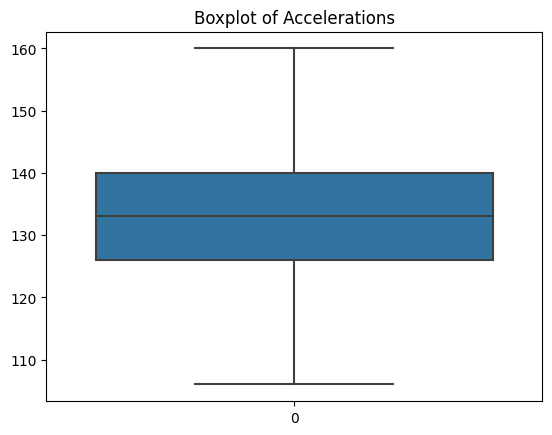

In [161]:
sns.boxplot(data['LB'])
plt.title('Boxplot of Accelerations')
plt.show()

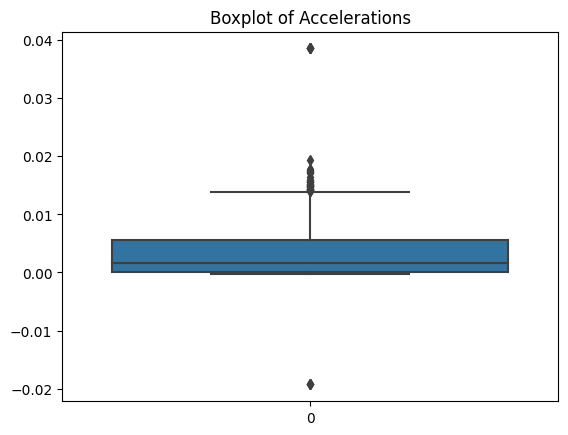

In [139]:
sns.boxplot(data['AC'])
plt.title('Boxplot of Accelerations')
plt.show()

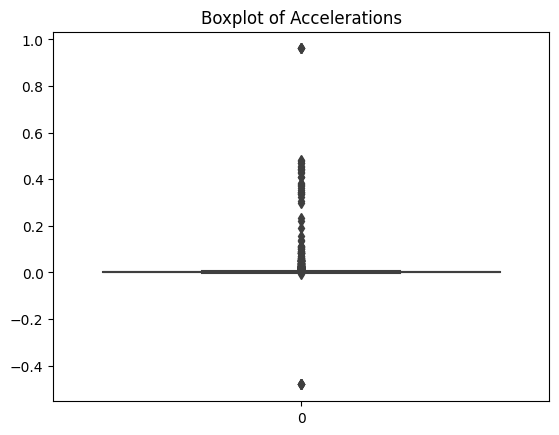

In [141]:
sns.boxplot(data['FM'])
plt.title('Boxplot of Accelerations')
plt.show()

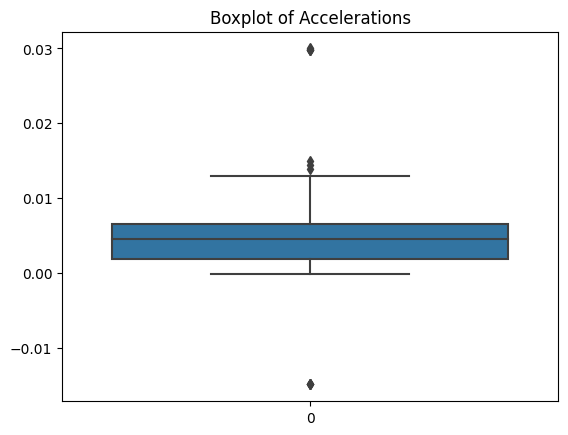

In [143]:
sns.boxplot(data['UC'])
plt.title('Boxplot of Accelerations')
plt.show()

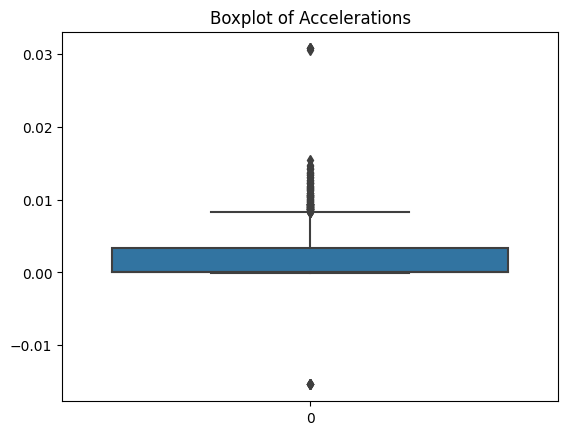

In [145]:
sns.boxplot(data['DL'])
plt.title('Boxplot of Accelerations')
plt.show()

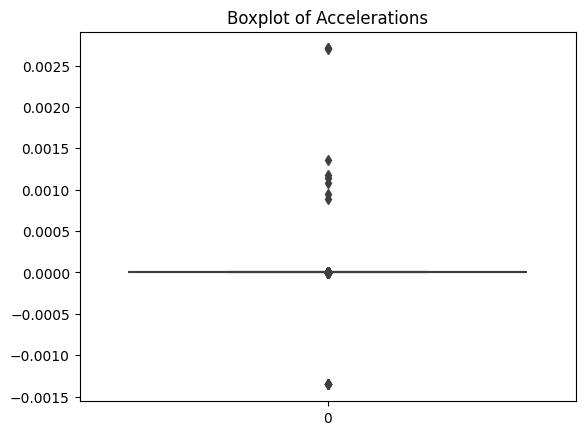

In [147]:
sns.boxplot(data['DS'])
plt.title('Boxplot of Accelerations')
plt.show()

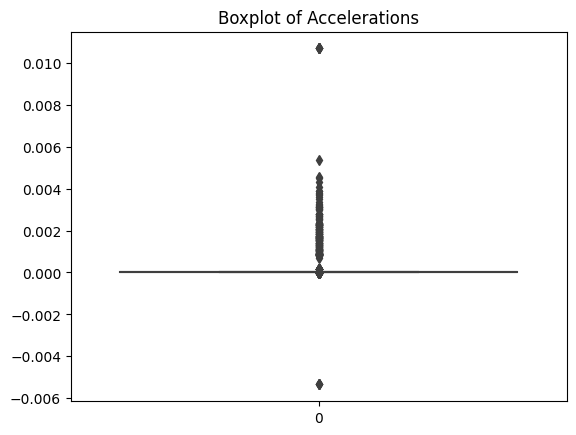

In [149]:
sns.boxplot(data['DP'])
plt.title('Boxplot of Accelerations')
plt.show()

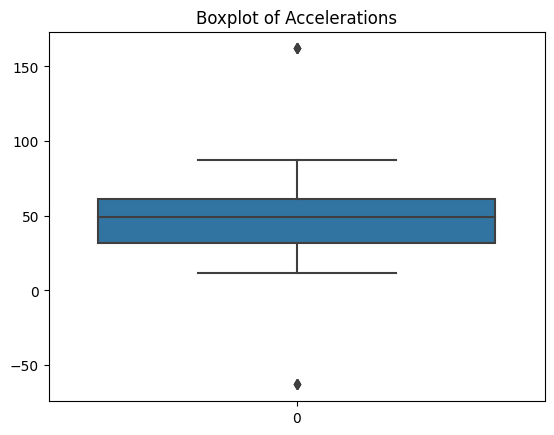

In [151]:
sns.boxplot(data['ASTV'])
plt.title('Boxplot of Accelerations')
plt.show()

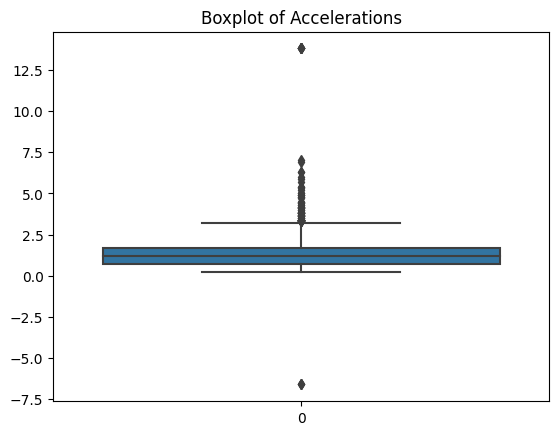

In [153]:
sns.boxplot(data['MSTV'])
plt.title('Boxplot of Accelerations')
plt.show()

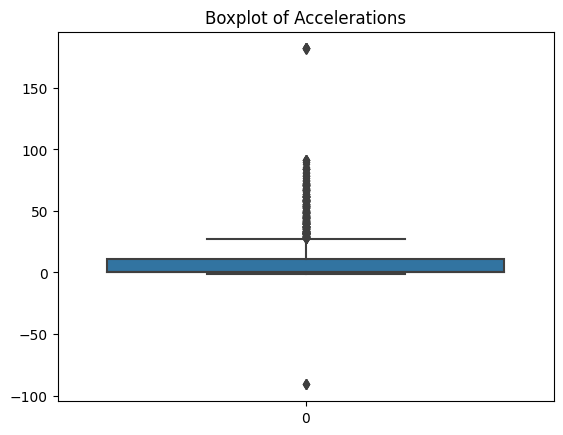

In [155]:
sns.boxplot(data['ALTV'])
plt.title('Boxplot of Accelerations')
plt.show()

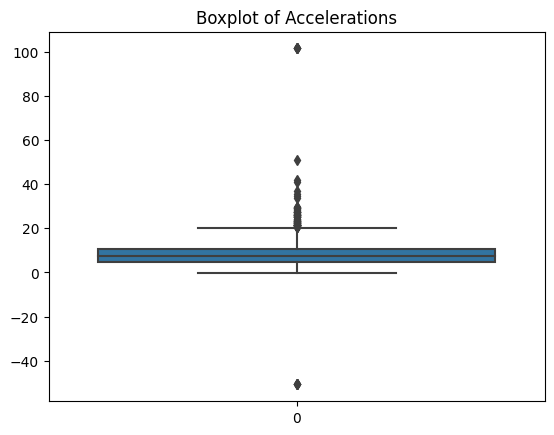

In [157]:
sns.boxplot(data['MLTV'])
plt.title('Boxplot of Accelerations')
plt.show()

Scatter plots for relationships between pairs of variables

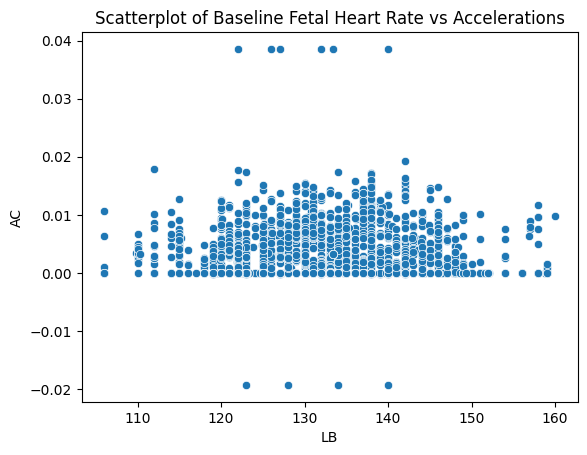

In [164]:
sns.scatterplot(x='LB', y='AC', data=data)
plt.title('Scatterplot of Baseline Fetal Heart Rate vs Accelerations')
plt.show()

Correlation heatmap

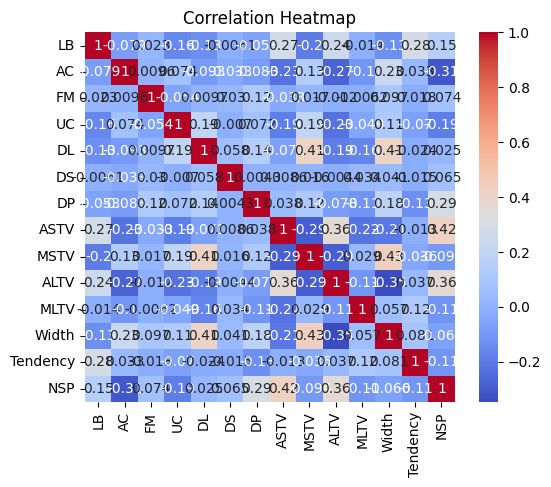

In [167]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Pattern Recognition and Insights

Identify correlations between variables

In [171]:
corr_matrix = data.corr()
print(corr_matrix)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.079131  0.022684 -0.158825 -0.131548 -0.006097   
AC       -0.079131  1.000000  0.009551  0.073641 -0.092699 -0.033150   
FM        0.022684  0.009551  1.000000 -0.053590  0.009679  0.029895   
UC       -0.158825  0.073641 -0.053590  1.000000  0.194653 -0.006993   
DL       -0.131548 -0.092699  0.009679  0.194653  1.000000  0.058483   
DS       -0.006097 -0.033150  0.029895 -0.006993  0.058483  1.000000   
DP       -0.053308 -0.083260  0.121190  0.071919  0.144907  0.004274   
ASTV      0.271344 -0.227224 -0.033409 -0.186542 -0.070526  0.008552   
MSTV     -0.195230  0.132557  0.017055  0.194464  0.410576  0.016066   
ALTV      0.244419 -0.270831 -0.012131 -0.229439 -0.187642 -0.004411   
MLTV     -0.013544 -0.104752 -0.006167 -0.048918 -0.164843  0.034398   
Width    -0.134381  0.234820  0.097294  0.111531  0.409417  0.040889   
Tendency  0.283046  0.033396 -0.018251 -0.070114 -0.023587 -0.01

Discuss potential implications of correlations:-

The strong positive correlation between LB and AC suggests a higher baseline fetal heart rate is associated with more accelerations.

This is one of the potential implications of correlations.

Look for trends or patterns over time:-

There is no temporal data in this dataset

# Conclusion

Summarize key insights and patterns:-

The exploratory analysis revealed a strong positive correlation between baseline fetal heart rate and accelerations, suggesting a potential relationship between these variables.

Discuss implications for decision-making or further analyses:-

This finding could inform the development of predictive models for fetal well-being and highlights the importance of considering multiple variables when assessing fetal health.